In [6]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install orion.algo.skopt

     |████████████████████████████████| 271 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 101 kB 11.0 MB/s ta 0:00:01
     |████████████████████████████████| 175 kB 27.4 MB/s eta 0:00:01     |████████████████████████████    | 153 kB 27.4 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 783 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 170 kB 20.2 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 352 kB/s  eta 0:00:01    |███▋                            | 1.5 MB 25.2 MB/s eta 0:00:01     |███████                         | 2.9 MB 25.2 MB/s eta 0:00:01     |██████████▍                     | 4.3 MB 25.2 MB/s eta 0:00:01     |████████████▉                   | 5.3 MB 25.2 MB/s eta 0:00:01     |█████████████████▊              | 7.3 MB 25.2 MB/s eta 0:00:0101
     |████████████████████████████████| 79.9 MB 96 kB

  Created wheel for PyYAML: filename=PyYAML-5.4.1-pp37-pypy37_pp73-linux_x86_64.whl size=122629 sha256=78944aaf6ffc0dee460218d60cfd922b5f09626479827dfc3cc586dd5bd64c8b
  Stored in directory: /home/jovyan/.cache/pip/wheels/b2/57/27/307a55c3e232770b6d5a27a815b0523b4e340911ddb2210874
Successfully built pymongo falcon retrying PyYAML
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install fitter

     |████████████████████████████████| 55 kB 2.5 MB/s eta 0:00:011
     |████████████████████████████████| 97 kB 5.1 MB/s  eta 0:00:01
  Created wheel for fitter: filename=fitter-1.3.0-py3-none-any.whl size=24741 sha256=e68cc641068a403f6bf94f70256b7439cb26c622eaa73730a917446fbc642a33
  Stored in directory: /home/jovyan/.cache/pip/wheels/a0/a8/8f/ee994e421071ad94c9e9968f250f941691ece9af983a142b3d
  Created wheel for easydev: filename=easydev-0.11.1-py3-none-any.whl size=64248 sha256=8ff1af7e2d50387f77abcdc1deaa8269c264830234c42c39f0c7954a0553ff28
  Stored in directory: /home/jovyan/.cache/pip/wheels/02/ab/67/fb34fe62d237fcb8e8dacea2229809399e2534b86db995620e
Successfully built fitter easydev
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Data Processing
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Graphs
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Processin and Modeling
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

# Others
# ==============================================================================
import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions

# Matplotlib configuration
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [11]:
# header: indicates if the dataset has an initial line with the name of each column
dataset = pd.read_csv('Computer-Hardware-Dataset-data-header.csv', sep = ',')

In [12]:
dataset.head(5)

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [14]:
# Column type
dataset.info()

TypeError: getsizeof(...)
    getsizeof(object, default) -> int

    Return the size of object in bytes.

sys.getsizeof(object, default) will always return default on PyPy, and
raise a TypeError if default is not provided.

First note that the CPython documentation says that this function may
raise a TypeError, so if you are seeing it, it means that the program
you are using is not correctly handling this case.

On PyPy, though, it always raises TypeError.  Before looking for
alternatives, please take a moment to read the following explanation as
to why it is the case.  What you are looking for may not be possible.

A memory profiler using this function is most likely to give results
inconsistent with reality on PyPy.  It would be possible to have
sys.getsizeof() return a number (with enough work), but that may or
may not represent how much memory the object uses.  It doesn't even
make really sense to ask how much *one* object uses, in isolation
with the rest of the system.  For example, instances have maps,
which are often shared across many instances; in this case the maps
would probably be ignored by an implementation of sys.getsizeof(),
but their overhead is important in some cases if they are many
instances with unique maps.  Conversely, equal strings may share
their internal string data even if they are different objects---or
empty containers may share parts of their internals as long as they
are empty.  Even stranger, some lists create objects as you read
them; if you try to estimate the size in memory of range(10**6) as
the sum of all items' size, that operation will by itself create one
million integer objects that never existed in the first place.


In [15]:
# Dataset dimensions
# ==============================================================================
dataset.shape

(209, 10)

In [16]:
# Number of NULL per variable
# ==============================================================================
dataset.isna().sum().sort_values()

Vendor Name    0
Model Name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

No variable contains missing values.

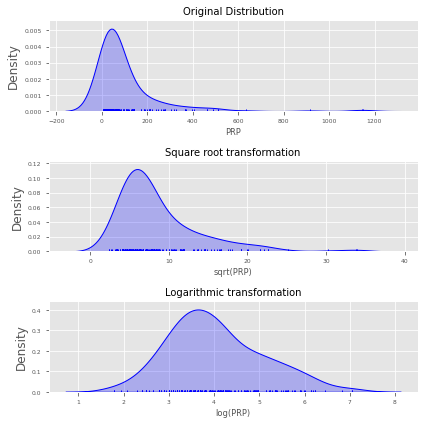

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    dataset.PRP,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original Distribution", fontsize = 'medium')
axes[0].set_xlabel('PRP', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(dataset.PRP),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(PRP)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(dataset.PRP),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logarithmic transformation", fontsize = 'medium')
axes[2].set_xlabel('log(PRP)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [18]:
distribution = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(dataset.PRP, distributions=distribution)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div
cauchy,0.000095,1983.614213,-3042.632444,inf
expon,0.000140,2072.617242,-2959.964849,inf
chi2,0.000144,1971.040769,-2949.866711,inf
beta,0.000148,1945.968924,-2938.647443,inf
exponpow,0.000193,1889.626312,-2887.960129,inf
powerlaw,0.000317,1516.788219,-2784.582492,inf
logistic,0.000358,2532.284014,-2764.277526,inf
norm,0.000465,2493.804996,-2709.609298,inf
gamma,0.000523,5731.337212,-2679.542364,inf


In [19]:
# Num Variables
# ==============================================================================
dataset.select_dtypes(include=['float64', 'int']).describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


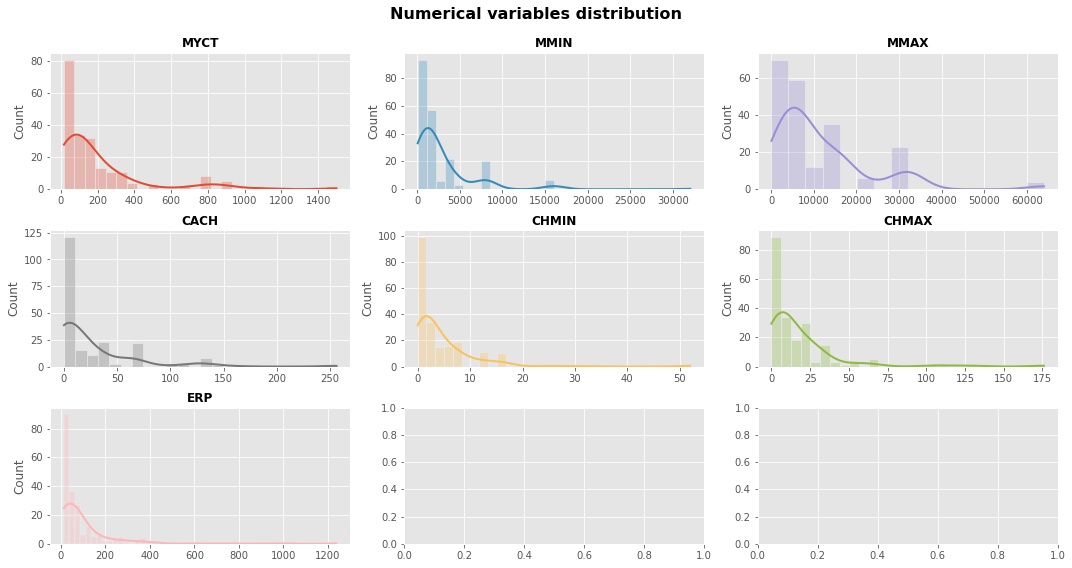

In [20]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [40, 12]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
axes = axes.flat
num_columns = dataset.select_dtypes(include=['float64', 'int']).columns
num_columns = num_columns.drop('PRP')

for i, colum in enumerate(num_columns):
    sns.histplot(
        data    = dataset,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Numerical variables distribution', fontsize = 16, fontweight = "bold");

The CACH variable, although of type numeric, takes a few values. In cases like this, it is often convenient to treat the variable as qualitative.

In [45]:
# Observed CACH values
# ==============================================================================
dataset.CACH.value_counts()

0      69
8      31
32     23
64     20
16     14
4       8
24      7
128     6
6       5
2       4
30      4
131     2
1       2
48      2
112     2
9       2
256     2
65      2
160     1
12      1
96      1
142     1
Name: CACH, dtype: int64

In [46]:
# The string type CACH variable is converted
# ==============================================================================
dataset.CACH = dataset.CACH.astype("str")

As the objective of the study is to predict the cpu relative performance, the analysis of each variable is also done in relation to the PRP response variable. By analyzing the data in this way, you can begin to get ideas about which variables are most related to PRP and in what way.

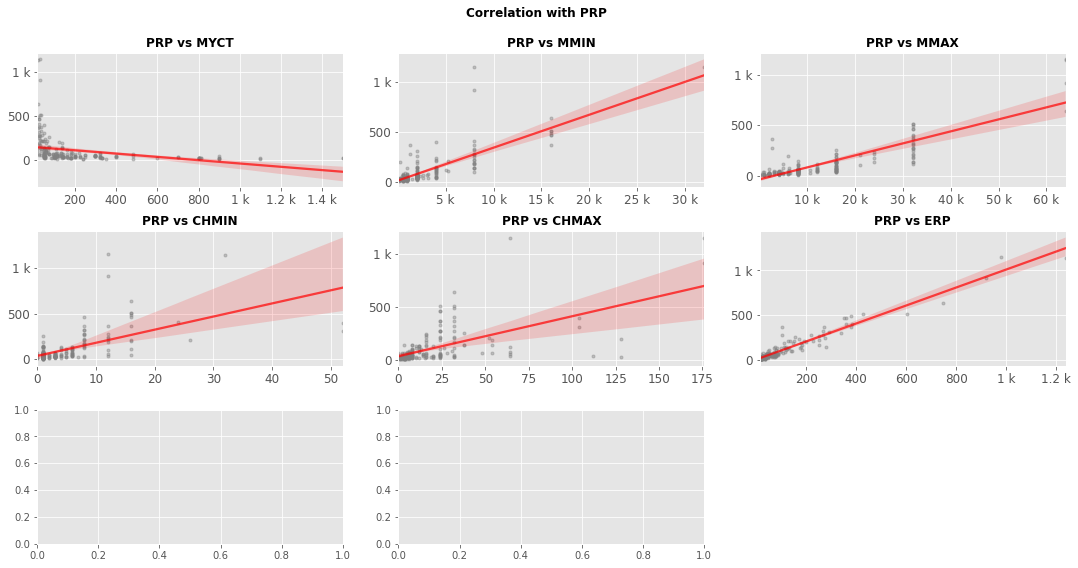

In [47]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
axes = axes.flat
num_columns = dataset.select_dtypes(include=['float64', 'int']).columns
num_columns = num_columns.drop('PRP')

for i, colum in enumerate(num_columns):
    sns.regplot(
        x           = dataset[colum],
        y           = dataset['PRP'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"PRP vs {colum}", fontsize = 12, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Empty axes are removed
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation with PRP', fontsize = 12, fontweight = "bold");

Some models suffer if they incorporate highly correlated predictors. For this reason, it is convenient to study the degree of correlation between the available variables.

In [48]:
# Correlation between numeric columns
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Function to convert a pandas correlation matrix to tidy format
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = dataset.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
47,ERP,PRP,0.966472,0.966472
41,PRP,ERP,0.966472,0.966472
20,MMAX,ERP,0.901202,0.901202
44,ERP,MMAX,0.901202,0.901202
19,MMAX,PRP,0.863004,0.863004
37,PRP,MMAX,0.863004,0.863004
13,MMIN,ERP,0.819292,0.819292
43,ERP,MMIN,0.819292,0.819292
12,MMIN,PRP,0.794931,0.794931
36,PRP,MMIN,0.794931,0.794931


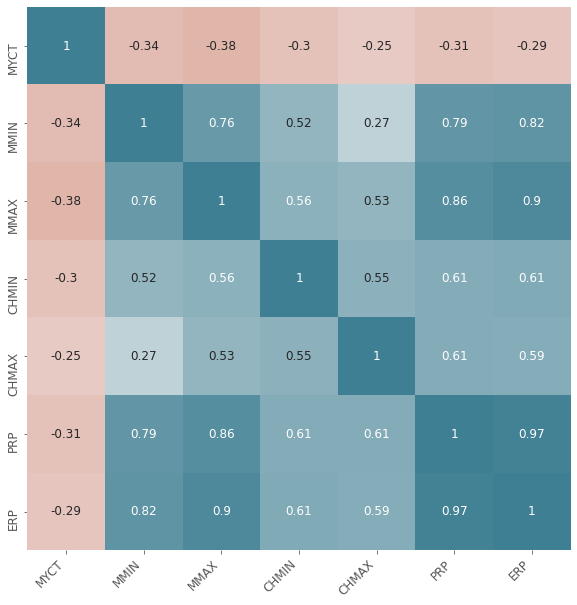

In [49]:
# Heatmap matrix of correlations
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 12},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 12)

In [50]:
# Qualitative variables (object type)
# ==============================================================================
dataset.select_dtypes(include=['object']).describe()

,Vendor Name,Model Name,CACH
count,209,209,209
unique,30,209,22
top,ibm,f4000/200ap,0
freq,32,1,69


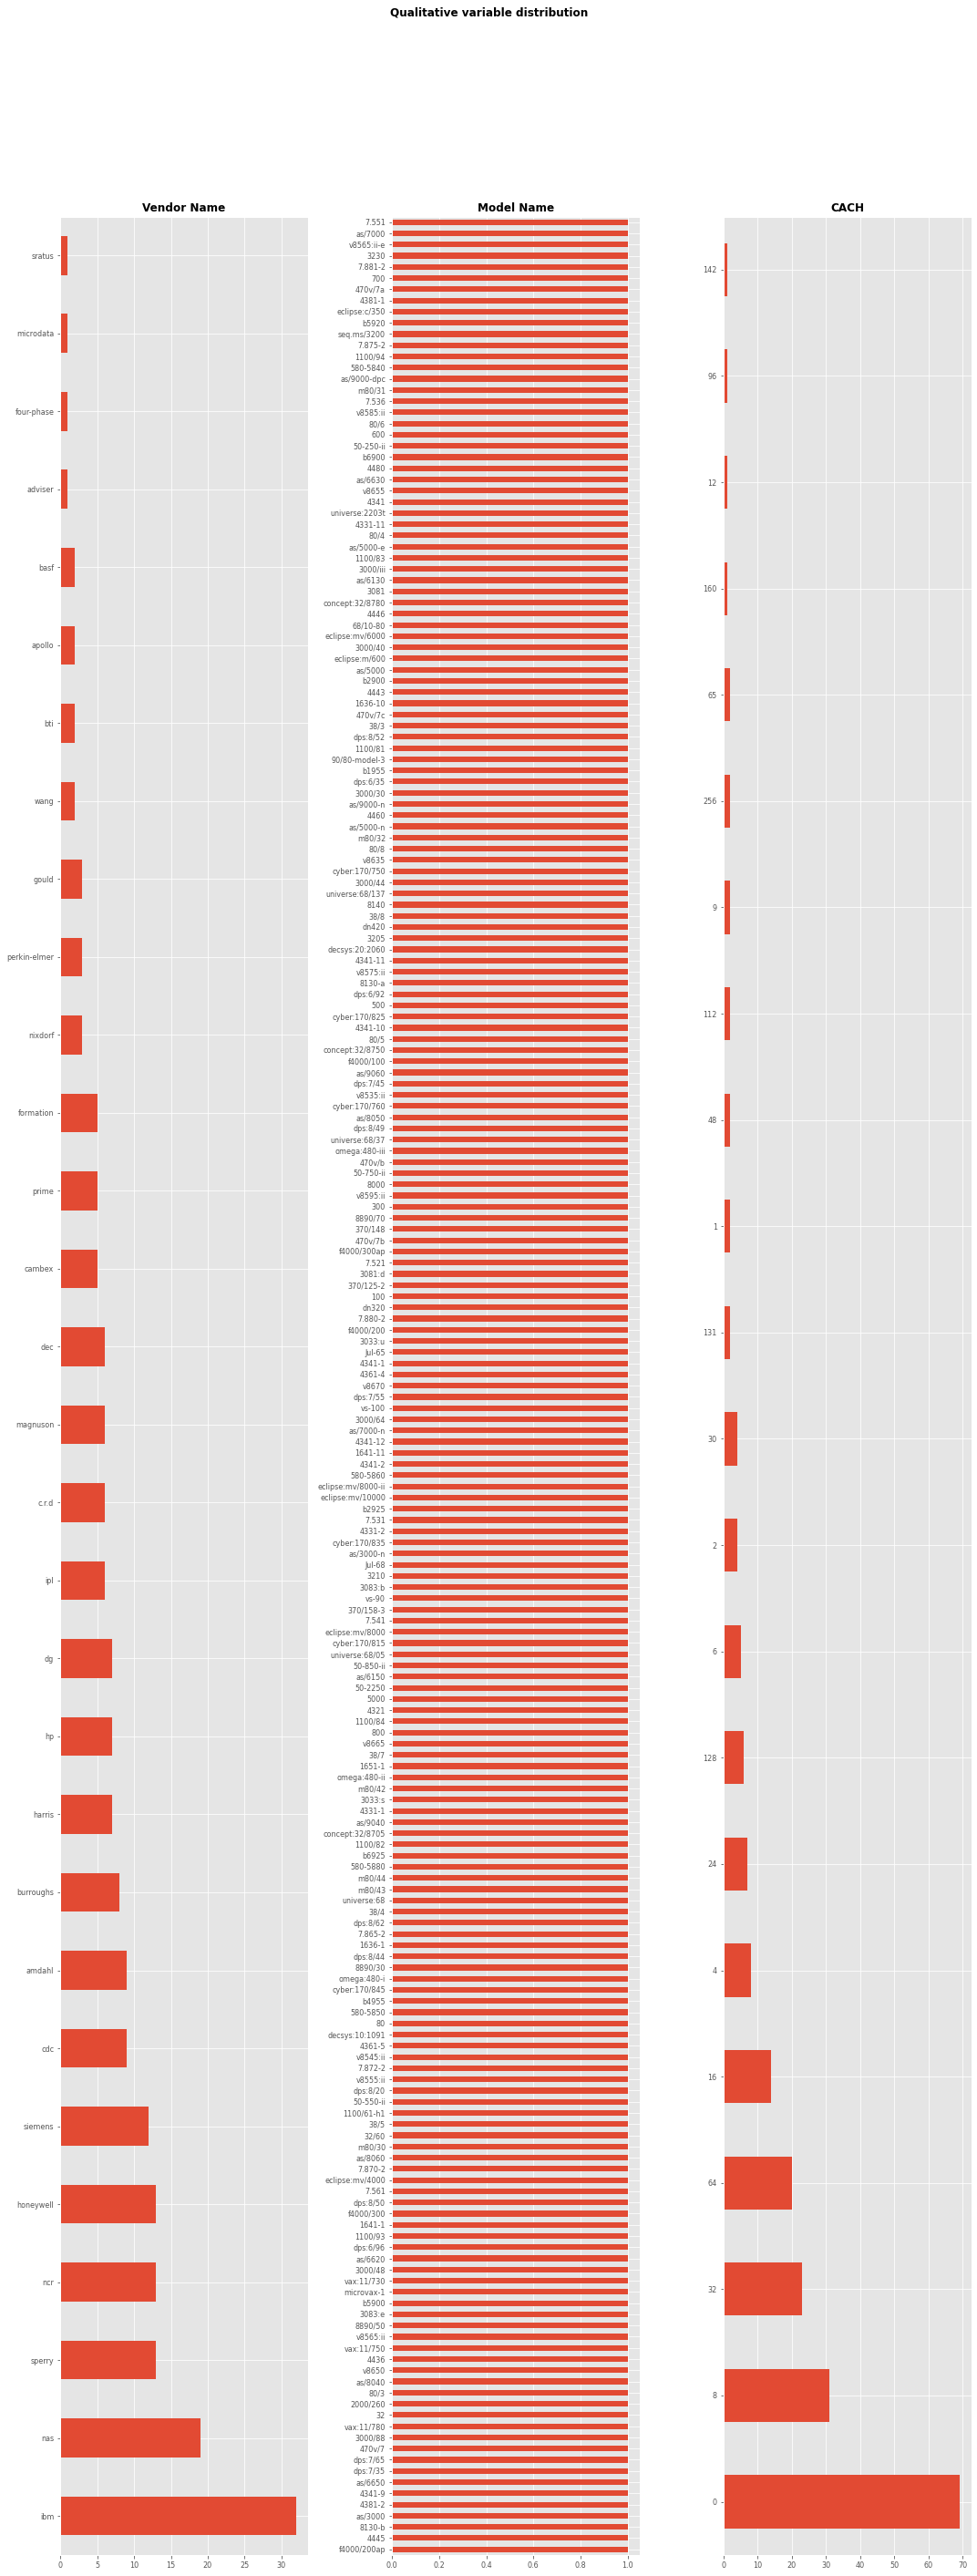

In [64]:
# Graph for each qualitative variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 40))
axes = axes.flat
object_columns = dataset.select_dtypes(include=['object']).columns

for i, colum in enumerate(object_columns):
    dataset[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")

# Empty axes are removed
#for i in [7, 8]:
#    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Qualitative variable distribution',
             fontsize = 12, fontweight = "bold");

If any of the levels of a qualitative variable have very few observations compared to the other levels, it may happen that, during cross-validation, some partitions do not contain any observations of that class (zero variance), which can lead to errors . In these cases, it is usually convenient:

Eliminate the minority group observations if it is a multiclass variable.

Delete the variable if it only has two levels.

Group minority levels into a single group.

Ensure that, when creating partitions, all groups are represented in each one of them.

In this case, you have to be careful with the CACH variable. Levels 4 upwards are unified into a new level called "4_plus".

In [67]:
dataset.CACH.value_counts(sort=True)

0      69
8      31
32     23
64     20
16     14
4       8
24      7
128     6
6       5
2       4
30      4
131     2
1       2
48      2
112     2
9       2
256     2
65      2
160     1
12      1
96      1
142     1
Name: CACH, dtype: int64

In [68]:
dic_replace = {'4': "4_plus",
               '24': "4_plus",
               '128': "4_plus",
               '6' : "4_plus",
               '2' : "4_plus",
               '30' : "4_plus",
               '131' : "4_plus",
               '1' : "4_plus",
               '48' : "4_plus",
               '112' : "4_plus",
               '9' : "4_plus",
               '256' : "4_plus",
               '65' : "4_plus",
               '160' : "4_plus",
               '12' : "4_plus",
               '96' : "4_plus",
               '142' : "4_plus"}

dataset['CACH'] = dataset['CACH'] \
                     .map(dic_replace) \
                     .fillna(dataset['CACH'])

In [70]:
dataset.CACH.value_counts(sort=True)

0         69
4_plus    52
8         31
32        23
64        20
16        14
Name: CACH, dtype: int64

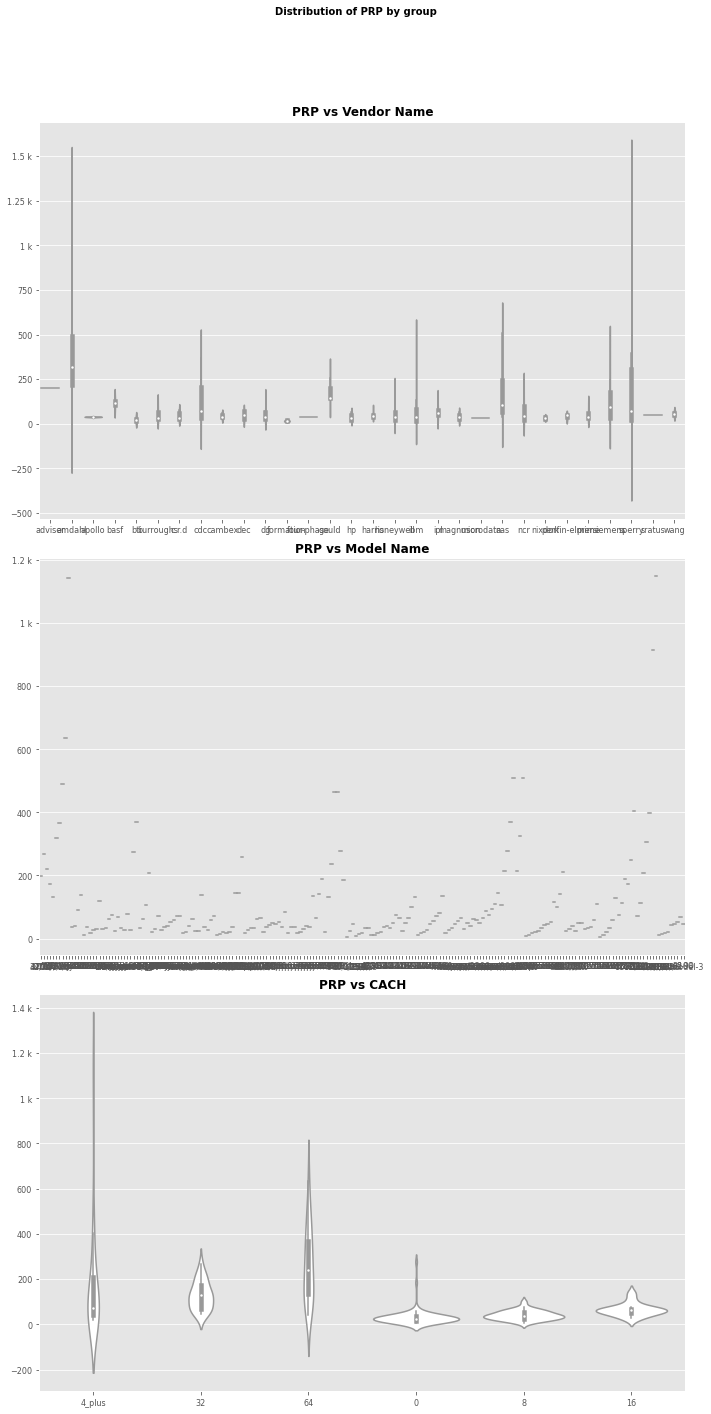

In [74]:
# Graph of the relationship between the PRP and each qualitative variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))
axes = axes.flat
object_columns = dataset.select_dtypes(include=['object']).columns

for i, colum in enumerate(object_columns):
    sns.violinplot(
        x     = colum,
        y     = 'PRP',
        data  = dataset,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"PRP vs {colum}", fontsize = 12, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
#for i in [7, 8]:
#    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribution of PRP by group', fontsize = 10, fontweight = "bold");

Evaluating the predictive capacity of a model consists of checking how close its predictions are to the true values of the response variable. The available data is divided into a training set and a test set. The proper size of the partitions depends largely on the amount of data available and the security that is needed in estimating the error, 80% -20% usually gives good results.

In [75]:
# Distribution of data in train and test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        dataset.drop('PRP', axis = 'columns'),
                                        dataset['PRP'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [76]:
print("Training partition")
print("-----------------------")
print(y_train.describe())

Training partition
-----------------------
count     167.000000
mean       99.227545
std       149.362286
min         6.000000
25%        27.500000
50%        46.000000
75%       105.500000
max      1150.000000
Name: PRP, dtype: float64


In [77]:
print("Test partition")
print("-----------------------")
print(y_test.describe())

Test partition
-----------------------
count      42.000000
mean      131.047619
std       200.179670
min         7.000000
25%        26.250000
50%        51.500000
75%       164.750000
max      1144.000000
Name: PRP, dtype: float64


In [78]:
# Selection of variables by type
# ==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

# Numeric columns are standardized and one-hot-encoding of the
# qualitative columns. To keep columns that do not apply
# no transformation has to be indicated remainder = 'passthrough'.
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                remainder='passthrough')

Once the ColumnTransformer object has been defined, the fit () method learns the transformations with the training data and applies them to the two sets with transform ()

In [79]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

The result returned by ColumnTransformer is a numpy array, so the column names are lost. It is usually interesting to be able to inspect how the dataset looks after preprocessing in dataframe format. By default, OneHotEncoder sorts new columns alphabetically from left to right.

In [80]:
# Convert the output to a dataframe and add the name of the columns
# ==============================================================================
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
data_train_prep = preprocessor.transform(X_train)
data_train_prep = pd.DataFrame(data_train_prep, columns=labels)
data_train_prep.info()

ValueError: Shape of passed values is (167, 1), indices imply (167, 207)